In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler  
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df_review = pd.read_csv("Electronic_dataset.csv")

In [3]:
df_review.head()

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [4]:
df_review.shape

(500000, 4)

In [5]:
# dropping the timestamp for the dataset
df_review.drop('timestamp', axis = 1, inplace=True)

In [6]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  500000 non-null  object 
 1   prod_id  500000 non-null  object 
 2   ratings  500000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.4+ MB


In [7]:
# checking for null data
df_review.isnull().sum()

user_id    0
prod_id    0
ratings    0
dtype: int64

In [8]:
# checking for duplicates
df_review.duplicated().sum()

0

In [9]:
# unique users
len(df_review['user_id'].unique())

448368

In [10]:
# unique products
len(df_review['prod_id'].unique())

130138

In [11]:
# ratings range
print(sorted(df_review['ratings'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]


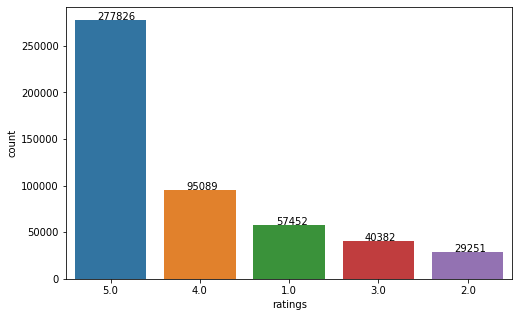

In [12]:
# count of the products for each ratings
plt.figure(figsize=(8,5))
ax = sns.countplot(df_review['ratings'], order = df_review['ratings'].value_counts().index)
for p, label in zip(ax.patches, df_review['ratings'].value_counts()):
    ax.annotate(label, (p.get_x()+ 0.25, p.get_height()+ 0.5))
plt.show()

In [13]:
df_review['ratings'].value_counts()

5.0    277826
4.0     95089
1.0     57452
3.0     40382
2.0     29251
Name: ratings, dtype: int64

In [14]:
# checking the number of products rated by each user
user_reviews_count = df_review.groupby(df_review['user_id']).count()

In [15]:
df_user_review_group = pd.DataFrame(user_reviews_count['prod_id'])
df_user_review_group.rename(columns = {'prod_id':'Prod_rated_count'}, inplace = True)
df_user_review_group

,Prod_rated_count
user_id,
A000186437REL8X2RW8UW,1
A00094601Z09BC1N3Q4L7,1
A0009878M2RGMMHGJH39,1
A0010326246DL36LSV742,1
A0015188MMYTOC3V4U11,1
...,...
AZZX23UGJGKTT,2
AZZX3COL525E6,1
AZZY9LPX8V5LS,1


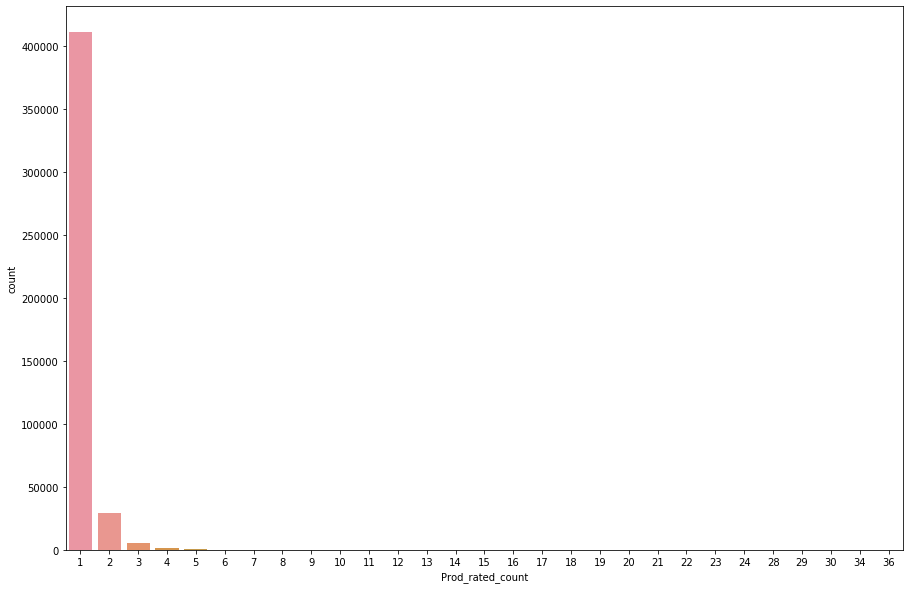

In [16]:
# visually checking the number of products rated by the user
plt.figure(figsize=(15,10))
sns.countplot(df_user_review_group['Prod_rated_count'])
plt.show()

In [17]:
# looking into the no of products rated by the users
df_user_review_group['Prod_rated_count'].value_counts()

1     411121
2      29138
3       5356
4       1522
5        507
6        288
7        152
8         87
9         61
10        28
11        24
12        22
13        12
14        11
15        11
16         5
18         4
19         4
20         3
17         2
23         2
34         1
21         1
22         1
24         1
28         1
29         1
30         1
36         1
Name: Prod_rated_count, dtype: int64

In [18]:
#users rated more than 5 products
df_user_review_group[df_user_review_group['Prod_rated_count'] > 5]

,Prod_rated_count
user_id,
A100UD67AHFODS,9
A100WO06OQR8BQ,10
A107D9T206Z36,6
A10NMELR4KX0J6,6
A10O7THJ2O20AG,8
...,...
AZBXKUH4AIW3X,7
AZHGPE0NPPQVT,6
AZIMOGTBT3LPP,6


In [19]:
#user who has rated most number of products
df_user_review_group[df_user_review_group['Prod_rated_count']==max(df_user_review_group['Prod_rated_count'])]

,Prod_rated_count
user_id,
A680RUE1FDO8B,36


In [20]:
# checking number of users rating each product
prod_rated_user_count = df_review.groupby(df_review['prod_id']).count()

In [21]:
df_prod_rated_user_count= pd.DataFrame(prod_rated_user_count['user_id'])
df_prod_rated_user_count.rename(columns = {'user_id':'No_of_users_rated'}, inplace = True)
df_prod_rated_user_count

,No_of_users_rated
prod_id,
0439886341,1
0528881469,1
0594012015,1
0594033926,1
0594451647,1
...,...
B00LKWZKH0,1
B00LMCPYPG,1
B00LMOH8DU,2


In [22]:
# range of users rating each product
df_prod_rated_user_count['No_of_users_rated'].value_counts()

1      73246
2      20782
3       9877
4       5923
5       3827
       ...  
226        1
354        1
163        1
227        1
285        1
Name: No_of_users_rated, Length: 255, dtype: int64

In [23]:
# checking the number of users rated more than 5 products
df_prod_rated_user_count[df_prod_rated_user_count['No_of_users_rated'] >5]

,No_of_users_rated
prod_id,
0972683275,58
1400501466,22
1400501520,6
1400501776,9
1400532620,8
...,...
B00K589F8A,8
B00K91DB7Y,12
B00KFAGCUM,11


In [24]:
# the product rated by most of the users
df_prod_rated_user_count[df_prod_rated_user_count['No_of_users_rated'] == max(df_prod_rated_user_count['No_of_users_rated'])]

,No_of_users_rated
prod_id,
B0074BW614,1138


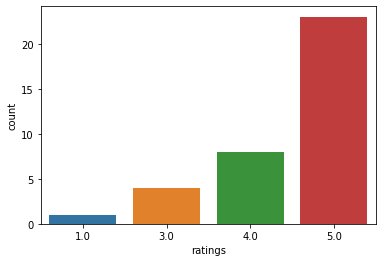

In [25]:
# checking the ratings distribution for the user who rated the most 
sns.countplot(df_review[df_review['user_id'] == "A680RUE1FDO8B"].ratings)
plt.show()

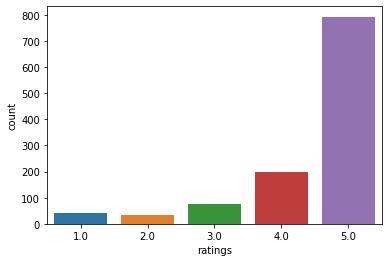

In [26]:
# checking the ratings distribution for the product that is rated the most 
sns.countplot(df_review[df_review['prod_id'] == "B0074BW614"].ratings)
plt.show()

# Popularity recommendation 

In [27]:
# getting the records based on the ratings for each product
df_review.groupby('prod_id')['ratings'].mean().sort_values(ascending=False)

prod_id
BT008G3W52    5.0
B004AC52UC    5.0
B004AGJRMC    5.0
B004AGED3A    5.0
B004AFOK2U    5.0
             ... 
B0092TLBA8    1.0
B00DKRX7LO    1.0
B00DKVY35O    1.0
B00028LF8Q    1.0
0439886341    1.0
Name: ratings, Length: 130138, dtype: float64

In [28]:
# checking for the top 10 most rated products 
df_review.groupby('prod_id')['ratings'].mean().sort_values(ascending=False).head(10)

prod_id
BT008G3W52    5.0
B004AC52UC    5.0
B004AGJRMC    5.0
B004AGED3A    5.0
B004AFOK2U    5.0
B004AFISUK    5.0
B004AFFZNI    5.0
B004AFEYU8    5.0
B004AEVIOY    5.0
B004AEVI4Y    5.0
Name: ratings, dtype: float64

In [29]:
ratings_mean_count = pd.DataFrame(df_review.groupby('prod_id')['ratings'].mean()) 

In [30]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_review.groupby('prod_id')['ratings'].count())  

In [31]:
# getting the product of the ratings with rating count
ratings_mean_count['product'] = ratings_mean_count['rating_counts']*ratings_mean_count['ratings']

In [32]:
ratings_mean_count.sort_values(by='product', ascending=False)

,ratings,rating_counts,product
prod_id,,,
B0074BW614,4.465729,1138,5082.0
B00DR0PDNE,3.943327,1094,4314.0
B007WTAJTO,4.417894,883,3901.0
B0019EHU8G,4.740310,774,3669.0
B003ELYQGG,4.386928,765,3356.0
...,...,...,...
B003OBY7T2,1.000000,1,1.0
B003O7LR8A,1.000000,1,1.0
B003O6SKYA,1.000000,1,1.0


In [33]:
print("Top 10 products")
ratings_mean_count.sort_values(by='product', ascending=False).head(10)

Top 10 products


,ratings,rating_counts,product
prod_id,,,
B0074BW614,4.465729,1138,5082.0
B00DR0PDNE,3.943327,1094,4314.0
B007WTAJTO,4.417894,883,3901.0
B0019EHU8G,4.740310,774,3669.0
B003ELYQGG,4.386928,765,3356.0
B006GWO5WK,4.275325,770,3292.0
B003ES5ZUU,4.684288,681,3190.0
B007R5YDYA,4.738998,659,3123.0
B00622AG6S,4.419162,668,2952.0


# Collaborative Filtering model

In [34]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate,train_test_split
from surprise import NormalPredictor
from surprise.model_selection import train_test_split
from surprise import SVD, KNNWithMeans
from surprise import accuracy,Prediction

In [35]:
reader = Reader(rating_scale=(1, 5))

In [36]:
# converting the dataset into the format of surprise
data = Dataset.load_from_df(df_review[['user_id','prod_id','ratings']], reader)

In [37]:
data.df.head()

,user_id,prod_id,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0


In [38]:
#splitting the data to train and test data
trainset, testset = train_test_split(data, test_size=0.30)

# SVD ( whole data)

In [39]:
alg_svd = SVD()

In [40]:
alg_svd.fit(trainset)

In [41]:
test_model = alg_svd.test(testset)
accuracy.rmse(test_model)

RMSE: 1.3428


1.34275949412269

In [42]:
pred_df = pd.DataFrame(test_model)
pred_df

,uid,iid,r_ui,est,details
0,A1KXHO4YM850QO,B00FFJ0HUE,5.0,3.923729,{'was_impossible': False}
1,A1NM8E86EVZ1MC,B000HWXGOS,2.0,3.783662,{'was_impossible': False}
2,A32NDENUQQQ77Q,B0031U1J1U,2.0,4.081761,{'was_impossible': False}
3,A136Q726TFRQH2,B009ZIILLI,5.0,4.141372,{'was_impossible': False}
4,A3F5ISMLQ04S79,B0028Y4DHM,5.0,4.015194,{'was_impossible': False}
...,...,...,...,...,...
149995,A1RY4E6WRWU0AR,B008KRFDBQ,1.0,3.763959,{'was_impossible': False}
149996,A2I5UZ3UW97LRV,B005KMOS74,5.0,4.131698,{'was_impossible': False}
149997,A33ATR1TDORXZF,B004M8RWCK,5.0,3.902730,{'was_impossible': False}
149998,AVUM2LX9LJW77,B004SBCF4Q,5.0,4.015194,{'was_impossible': False}


In [43]:
def recommendations(x, n):
    recom = pred_df[pred_df['uid']==x][['uid','iid','r_ui','est']].sort_values(by='est', ascending=False).head(n)
    return recom

In [44]:
# checking the recommendations for the user id A680RUE1FDO8B for k value = 5
recommendations('A680RUE1FDO8B',5)

,uid,iid,r_ui,est
55824,A680RUE1FDO8B,B0019EHU8G,5.0,5.000000
122480,A680RUE1FDO8B,B000V1MLBE,5.0,4.813131
43262,A680RUE1FDO8B,B00BOHNYTW,5.0,4.787017
48872,A680RUE1FDO8B,B003ZSAKMM,3.0,4.577745
27150,A680RUE1FDO8B,B000TMI0VU,4.0,4.423839


# Item Item based

In [88]:
## due to memory issue constraint taking just 10000 records

In [116]:
df_review_subset = df_review.sample(10000)

In [117]:
reader = Reader(rating_scale=(1, 5))

In [118]:
data_sub = Dataset.load_from_df(df_review_subset[['user_id','prod_id','ratings']], reader)

In [119]:
trainset, testset = train_test_split(data_sub, test_size=0.30)

In [120]:
algo_item= KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [121]:
test_pred_item = algo_item.test(testset)

In [122]:
accuracy.rmse(test_pred_item)

RMSE: 1.3877


1.3876939784901046

In [123]:
pred_df_item = pd.DataFrame(test_pred_item)
pred_df_item

,uid,iid,r_ui,est,details
0,A2YUNQWWB5UUY3,B005DHL0EK,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
1,A2A0ZXKYIQOWRL,B001MSVPM6,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
2,A1JH5EKCDJPXSH,B0074BW614,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
3,ATWVJUHW78DQL,B004WP1G5C,4.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
4,A1LBI6DHR8P56J,B001T9N9L8,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
...,...,...,...,...,...
2995,A3DNB0BZI6XE37,B006GWO5WK,2.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
2996,A2X7W2S7JD1NKY,B007HBLX5G,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
2997,A2VI63IVQRFH0U,B000UWX70S,4.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
2998,A1ECMHQYNGK52K,B003NR57BY,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."


In [124]:
def recommendations(x, n):
    recom = pred_df_item[pred_df_item['uid']==x][['uid','iid','r_ui','est']].sort_values(by='est', ascending=False).head(n)
    return recom

In [139]:
# checking the recommendations for the user id A3K93OWHKHGI9V
recommendations('A1VZ6LPIV8I1R5',5)

,uid,iid,r_ui,est
2186,A1VZ6LPIV8I1R5,B000ID7QNI,5.0,4.043511
852,A1VZ6LPIV8I1R5,B006GHYBGK,5.0,4.028571


# User User based

In [127]:
algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [128]:
test_pred_user = algo_user.test(testset)

In [129]:
accuracy.rmse(test_pred_user)

RMSE: 1.3890


1.3889654545789125

In [130]:
pred_df_user= pd.DataFrame(test_pred_user)
pred_df_user

,uid,iid,r_ui,est,details
0,A2YUNQWWB5UUY3,B005DHL0EK,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
1,A2A0ZXKYIQOWRL,B001MSVPM6,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
2,A1JH5EKCDJPXSH,B0074BW614,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
3,ATWVJUHW78DQL,B004WP1G5C,4.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
4,A1LBI6DHR8P56J,B001T9N9L8,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
...,...,...,...,...,...
2995,A3DNB0BZI6XE37,B006GWO5WK,2.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
2996,A2X7W2S7JD1NKY,B007HBLX5G,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
2997,A2VI63IVQRFH0U,B000UWX70S,4.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."
2998,A1ECMHQYNGK52K,B003NR57BY,5.0,4.028571,"{'was_impossible': True, 'reason': 'User and/o..."


In [131]:
def recommendations(x, n):
    recom = pred_df_user[pred_df_user['uid']==x][['uid','iid','r_ui','est']].sort_values(by='est', ascending=False).head(n)
    return recom

In [141]:
# checking the recommendations for the user id A3K93OWHKHGI9V
recommendations('A1VZ6LPIV8I1R5',5)

,uid,iid,r_ui,est
2186,A1VZ6LPIV8I1R5,B000ID7QNI,5.0,4.043511
852,A1VZ6LPIV8I1R5,B006GHYBGK,5.0,4.028571


# SVD (with 1 % data)

In [133]:
alg_svd = SVD()

In [134]:
alg_svd.fit(trainset)

In [135]:
test_model = alg_svd.test(testset)
accuracy.rmse(test_model)

RMSE: 1.3850


1.3850450123194193

In [136]:
pred_df = pd.DataFrame(test_model)
pred_df

,uid,iid,r_ui,est,details
0,A2YUNQWWB5UUY3,B005DHL0EK,5.0,4.028571,{'was_impossible': False}
1,A2A0ZXKYIQOWRL,B001MSVPM6,5.0,4.028571,{'was_impossible': False}
2,A1JH5EKCDJPXSH,B0074BW614,5.0,4.480292,{'was_impossible': False}
3,ATWVJUHW78DQL,B004WP1G5C,4.0,4.028571,{'was_impossible': False}
4,A1LBI6DHR8P56J,B001T9N9L8,5.0,4.028571,{'was_impossible': False}
...,...,...,...,...,...
2995,A3DNB0BZI6XE37,B006GWO5WK,2.0,4.222285,{'was_impossible': False}
2996,A2X7W2S7JD1NKY,B007HBLX5G,5.0,4.028571,{'was_impossible': False}
2997,A2VI63IVQRFH0U,B000UWX70S,4.0,4.114052,{'was_impossible': False}
2998,A1ECMHQYNGK52K,B003NR57BY,5.0,4.028571,{'was_impossible': False}


In [137]:
def recommendations(x, n):
    recom = pred_df[pred_df['uid']==x][['uid','iid','r_ui','est']].sort_values(by='est', ascending=False).head(n)
    return recom

In [142]:
# checking the recommendations for the user id A3K93OWHKHGI9V
recommendations('A1VZ6LPIV8I1R5',5)

,uid,iid,r_ui,est
2186,A1VZ6LPIV8I1R5,B000ID7QNI,5.0,4.043511
852,A1VZ6LPIV8I1R5,B006GHYBGK,5.0,4.028571


In [ ]:
## 55% of the products are rated 5
## Most of the users have rated only 1 product
## The user A680RUE1FDO8B rated the most number of products - 36 in count
## The product that has been rated the most - B0074BW614

## Popularity based approach - When the user profile is not obtained, products can be recommended based on the ratings received for it.
## SVD - was able to build model for the entire data RMSE obatined was 1.34275949412269. 

## for collaborative took 1% of data
## Item-Item based RMSE - 1.3876939784901046
## User-User based RMSE - 1.3889654545789125
## Also did SVD for the 1% data and got the RMSE - 1.3850450123194193
## RMSE seems to be differing only in small magnitude and the recommendations for the users are the same in all the models.
## Since the antitest dataset was not creted, the model returned based on the ratings already available for the products("Gray sheep problem")
